In [1]:

import seaborn as sns  
import matplotlib.pyplot as plt  
import pandas as pd 
from tqdm import tqdm  
import os 
import statsmodels.api as sm  
from scipy import stats
import numpy as np
from scipy.stats import mannwhitneyu,ttest_ind

gut=[
'麦胶蛋白抗体'
,'组织转麸胺酶抗体'
,'分泌型免疫球蛋白'
,'钙卫蛋白'
,'解连蛋白'
,'葡萄糖醛酸酶'
,'胰弹性蛋白酶']

gut_english = ['Anti-gliadin slgA', 'Anti-htTG slgA', 
       'slgA', 'Calprotectin', 'Zonulin', 
       'Beta-Glucuronidase', 'Pancreatic Elastase']
 
organic_acid=['尿肌酐-1073'
,'46. 阿拉伯糖醇'
,'45. 酒石酸'
,'44. 柠苹酸'
,'43. 丙三羧酸'
,'42. 二羟基苯丙酸'
,'41. 吲哚乙酸'
,'40. 4-羟基苯乙酸'
,'39. 4-羟基苯甲酸'
,'38. 苯丙酸'
,'37. 苯乙酸'
,'36. 马尿酸'
,'35. 苯甲酸'
,'34. 乳清酸'
,'33. 焦谷氨酸'
,'32. α-羟丁酸'
,'31. 葡萄糖二酸'
,'30. 苯基乙醛酸'
,'29. 杏仁酸'
,'28. 2-甲基马尿酸'
,'1. 己二酸'
,'2. 辛二酸'
,'3. 乙基丙二酸'
,'4. 丙酮酸'
,'5. 乳酸'
,'6. β-羟基丁酸'
,'7. 柠檬酸'
,'8. 顺式乌头酸'
,'9. 异柠檬酸'
,'10. α-酮戊二酸'
,'11. 琥珀酸'
,'12. 富马酸'
,'13. 苹果酸'
,'14. 羟甲基戊二酸'
,'15. α-酮异戊酸'
,'16. α-酮异己酸'
,'17. α-酮-β-甲基戊酸'
,'18. 黄尿酸'
,'19. β-羟基异戊酸'
,'20. 甲基丙二酸'
,'22. 高香草酸'
,'23. 香草基扁桃酸'
,'24. 5-羟吲哚乙酸'
,'25. 犬尿喹啉酸'
,'26. 吡啶甲酸'
,'27. 喹啉酸'
,'21. 亚胺甲基谷氨酸'
]

organic_acid_english = ['Urinary creatinine', 'Arabitol', 'Tartaric acid', 'Citric acid',
                 'Tricarboxylic acid', 'Dihydroxyphenylacetic acid', 'Indole-3-acetic acid',
                 '4-Hydroxyphenylacetic acid', '4-Hydroxybenzoic acid', 'Phenylpropanoic acid',
                 'Phenylacetic acid', 'Hippuric acid', 'Benzoic acid', 'Lactic acid',
                 'Fumaric acid', 'α-Hydroxybutyric acid', 'Glucaric acid',
                 'Phenylacetaldehyde acid', 'Mandelic acid', '2-Methylhippuric acid',
                 'Hexanedioic acid', 'Octanedioic acid', 'Ethylmalonic acid',
                 'Pyruvic acid', 'Lactic acid', 'β-Hydroxybutyric acid',
                 'Citric acid', 'Cis-aconitic acid', 'Isocitric acid',
                 'α-Ketoglutaric acid', 'Succinic acid', 'Fumaric acid',
                 'Malic acid', 'Hydroxymethyl glutaric acid',
                 'α-Ketoisovaleric acid', 'α-Ketoisocaproic acid',
                 'α-Keto-β-methylvaleric acid', 'Uric acid',
                 'β-Hydroxyisovaleric acid', 'Methylmalonic acid',
                 'Vanillic acid', 'Vanilloylmandelic acid',
                 '5-Hydroxyindole-3-acetic acid', 'Kynurenic acid',
                 'Pyridinecarboxylic acid', 'Quinolinic acid',
                 'Imidazole methyl glutamic acid']

cytokine=['干扰素α'
,'肿瘤坏死因子'
,'干扰素γ'
,'白介素12'
,'白介素1β'
,'白介素17'
,'白介素10'
,'白介素8'
,'白介素6'
,'白介素5'
,'白介素4'
,'白介素2'
]

cytokine_english = [
    'IFN-α', 'TNF', 'IFN-γ',
    'IL-12', 'IL-1β', 'IL-17',
    'IL-10', 'IL-8', 'IL-6',
    'IL-5', 'IL-4', 'IL-2'
]

oxidative=[
'8-羟基脱氧鸟苷'
,'丙二醛'
,'谷胱甘肽'
,'含硫化合物'
,'谷胱甘肽硫转移酶'
,'谷胱甘肽过氧化物酶'
,'超氧化物歧化酶'
,'花生四烯酸过氧化物'
,'硝化酪氨酸']


oxidative_english = [
    '8-OHdG', 
    'MDA', 
    't-GSH', 
    'f-Thiol', 
    'GSTs', 
    'GSHPx', 
    'SOD',  
    'F2-losPs', 
    'Nitrotyrosine'  
]

Hormone=[
'三氯沙'
,'双酚A'
,'单甲基酯'
,'单乙基酯'
,'单丁基酯'
,'单苄基酯'
,'单乙基己基酯'
,'甲酯'
,'乙酯'
,'丙酯'
,'丁酯'
,'壬基苯酯'
,'辛基苯酯'
,'丁基苯酯'
]

Hormone_english = ['Triclosan', 'Bisphenol A', 'Monomethyl ester', 'Monoethyl ester', 'Monobutyl ester', 'Monobenzyl ester', 
            'Monooctyl ester', 'Methyl ester', 'Ethyl ester', 'Propyl ester', 'Butyl ester', 
            'Nonylphenol ester', 'Octylphenol ester', 'Butylphenol ester']

foodallergy=['牛奶'
,'玉米'
,'虾'
,'鳕鱼'
,'猪肉'
,'羊肉'
,'鸡肉'
,'牛肉'
,'蛋黄'
,'蛋白'
,'羊奶'
,'芒果'
,'香蕉'
,'苹果'
,'番茄'
,'土豆'
,'韭菜'
,'芹菜'
,'花生'
,'大豆/毛豆'
,'小麦'
,'鳗鱼'
,'鱿鱼'
,'蛤'
,'蟹'
,'鲍鱼'
,'鸭肉'
,'酸奶'
,'巧达芝士'
,'菠萝'
,'薏仁'
,'燕麦'
,'米'
,'麸质'
,'荞麦'
,'金枪鱼'
,'鱼翅'
,'鲑鱼'
,'牡蛎'
,'海带'
,'生姜'
,'大蒜'
,'辣椒'
,'可可豆'
,'芝麻'
,'核桃'
,'杏仁'
,'葵花籽'
,'绿豆'
,'花豆'
,'包心菜'
,'绿花椰菜'
,'竹笋'
,'芦笋'
,'茶'
,'咖啡'
,'香草'
,'蜂蜜'
,'酵母'
,'胡椒'
,'菠菜'
,'青椒/彩椒'
,'豌豆'
,'洋葱'
,'莴苣'
,'青葱'
,'茄子'
,'小黄瓜'
,'白花椰菜'
,'胡萝卜'
,'龙眼/桂圆'
,'柠檬'
,'奇异果'
,'番石榴'
,'葡萄柚'
,'葡萄'
,'蘑菇'
,'芋头'
,'地瓜'
,'四季豆'
,'酪梨'
,'椰子'
,'西瓜'
,'草莓'
,'樱桃'
,'梨子'
,'桃子'
,'木瓜'
,'柑橘类'
,'橄榄'
,'免疫球蛋白E'
            ]

foodallergy_english= ['Milk', 'Corn', 'Shrimp', 'Cod', 'Pork', 'Lamb', 'Chicken', 'Beef', 'Egg yolk', 'Egg white', 
                'Sheep milk', 'Mango', 'Banana', 'Apple', 'Tomato', 'Potato', 'Garlic chives', 
                'Celery', 'Peanut', 'Soybean/Edamame', 'Wheat', 'Eel', 'Squid', 'Clam', 'Crab', 
                'Abalone', 'Duck', 'Yogurt', 'Cheddar cheese', 'Pineapple', 'Coixseed', 
                'Oats', 'Rice', 'Gluten', 'Buckwheat', 'Tuna', 'Shark fin', 'Salmon', 'Oyster', 
                'Kelp', 'Ginger', 'Garlic', 'Chili', 'Cocoa bean', 'Sesame', 'Walnut', 
                'Almond', 'Sunflower seed', 'Mung bean', 'Scarlet runner bean', 'Cabbage', 
                'Broccoli', 'Bamboo shoots', 'Asparagus', 'Tea', 'Coffee', 'Vanilla', 
                'Honey', 'Yeast', 'Pepper', 'Spinach', 'Bell pepper', 'Pea', 'Onion', 
                'Lettuce', 'Green onion', 'Eggplant', 'Cucumber', 'Cauliflower', 'Carrot', 
                'Longan', 'Lemon', 'Kiwi', 'Guava', 'Grapefruit', 'Grape', 'Mushroom', 
                'Taro', 'Sweet potato', 'Green bean', 'Avocado', 'Coconut', 'Watermelon', 
                'Strawberry', 'Cherry', 'Pear', 'Peach', 'Papaya', 'Citrus fruits', 
                'Olive', 'Immunoglobulin E']

VD=['维生素D'
,'维生素D3'
,'维生素D2']

VD_english=['Vitamin D', 'Vitamin D3', 'Vitamin D2']


=dict(zip(gut+organic_acid+cytokine+oxidative+foodallergy+VD+Hormone
,gut_english+organic_acid_english+cytokine_english+oxidative_english+foodallergy_english+VD_english+Hormone_english))

In [2]:
eng_chi_dict['辛基苯酯']

'Octylphenol ester'

In [3]:
import seaborn as sns  
import matplotlib.pyplot as plt  
import pandas as pd 
from tqdm import tqdm  
import os 
import statsmodels.api as sm  
import numpy as np
from scipy import stats

In [4]:
newdf=pd.read_csv('basicinformation_Yseq.csv',index_col=0).iloc[:,1:6]

In [5]:
newdf

,number,age,sex,source,ID
0,CM202304160097,5.0,female,This study,ASD_B22
1,CM202304160098,6.0,male,This study,ASD_B17
2,CM202304160099,5.0,male,This study,ASD_B24
3,CM202304160101,5.0,female,This study,ASD_B04
4,CM202304160103,6.0,female,This study,ASD_B40
...,...,...,...,...,...
271,SRR8697688,4.0,male,PRJNA525890,NaN
272,SRR8697689,4.0,male,PRJNA525890,NaN
273,SRR8697710,5.0,male,PRJNA525890,NaN
274,SRR8697711,4.0,male,PRJNA525890,NaN


In [6]:
alldata_pivot=pd.read_csv('alldata_pivot_indicator_gene.csv',index_col=0)

In [7]:
alldata_pivot=pd.merge(alldata_pivot,newdf,left_on='病历号',right_on='ID')

In [8]:
alldata_pivot['sexnum']=alldata_pivot['sex'].map({'male':1,'female':0})

In [9]:
Genes=list(alldata_pivot.iloc[:,187:-7].columns)

In [10]:
alldata_pivot['Y']=0
alldata_pivot.loc[ alldata_pivot['type']=='ASD' ,'Y' ]=1

In [11]:
df1=alldata_pivot[Hormone+Genes+['type','病历号']].dropna().replace('mut',1).replace('nonmutant',0)

In [12]:
df1

,三氯沙,双酚A,单甲基酯,单乙基酯,单丁基酯,单苄基酯,单乙基己基酯,甲酯,乙酯,丙酯,...,chr15-23293713-23293713-C-T-HERC2P2,chr1-16973606-16973606-G-T-MST1P2,chr1-148891790-148891790-T-A-NBPF25P,chr5-21492197-21492197-A-G-GUSBP1,chr1-1645050-1645050-C-T-CDK11B,chr15-32717010-32717010-G-A-ULK4P1,chr5-99715833-99715833-T-A-LOC100133050,chr1-148932713-148932713-C-T-NBPF25P,type,病历号
0,145.80,2.83,83.82,65.12,117.08,0.12,45.28,35.22,0.59,6.55,...,0,1,0,0,0,1,0,0,ASD,ASD_051
1,0.70,2.51,152.40,39.35,733.25,0.49,9.73,61.30,3.14,2.63,...,1,1,1,0,0,1,0,0,ASD,ASD_052
2,2.61,2.75,53.36,80.48,193.38,0.32,34.00,30.03,0.16,0.73,...,0,1,0,0,1,1,0,0,ASD,ASD_053
3,0.64,1.47,35.41,16.94,88.96,0.06,27.94,95.90,2.32,0.08,...,0,1,0,0,0,1,0,0,ASD,ASD_054
4,3.24,11.14,60.18,24.14,152.70,0.17,26.12,38.72,0.35,2.94,...,0,1,0,0,0,0,0,0,ASD,ASD_055
5,17.13,3.13,49.05,76.13,346.01,0.30,16.42,26.13,24.66,0.98,...,1,1,1,0,0,1,0,0,ASD,ASD_056
6,11.32,4.77,32.65,71.61,504.63,8.44,19.19,41.32,78.23,2.02,...,0,1,0,0,1,1,0,0,ASD,ASD_057
7,0.20,1.15,282.34,122.90,158.31,0.16,4.29,3.86,0.13,0.57,...,0,1,0,0,0,1,0,0,ASD,ASD_058
8,0.94,0.57,20.79,7.75,78.37,0.17,2.13,3.43,0.17,0.36,...,0,1,0,0,1,1,0,0,ASD,ASD_060
9,1.20,4.18,574.72,130.20,769.45,0.44,52.57,7.00,0.51,0.50,...,0,1,0,0,0,1,0,0,ASD,ASD_062


In [13]:
testall_ls=cytokine+oxidative+["5. 乳酸", '6. β-羟基丁酸', '7. 柠檬酸', '8. 顺式乌头酸', '9. 异柠檬酸',
              "10. α-酮戊二酸","11. 琥珀酸","12. 富马酸",'13. 苹果酸','14. 羟甲基戊二酸']+['解连蛋白',  '钙卫蛋白', '分泌型免疫球蛋白',]

In [14]:
df2=pd.DataFrame()
for i in testall_ls:
    df2[i]=alldata_pivot.loc[df1.index,i].fillna(alldata_pivot.loc[df1.index,i].mean())

In [15]:
df=pd.concat([df1,df2],axis=1)

In [16]:
model_desc = """
gene ~ hormone
indicator ~ gene + hormone
"""

In [22]:
1

1

In [23]:
from semopy import Model

In [25]:
reresultdict2={}
for hormone in tqdm(Hormone):
    lsall=[]
    for indicator in testall_ls:
        for gene in Genes:
            subdf=df[[hormone,gene,indicator]]
            subdf.columns=['hormone','gene','indicator']
            model = Model(model_desc)
            try:
                fit_result = model.fit(subdf)
                if model.inspect().loc[0,'p-value']<0.05:
                    if model.inspect().loc[1,'p-value']<0.05:
                        reresultdict2[(hormone,gene,indicator)]=model.inspect()
            except:
                print('ERROR')

  0%|          | 0/14 [00:00<?, ?it/s]WARNING:root:Sample covariance matrix is not PD. It may indicate that data is bad. Also, it arises often when polychoric/polyserial correlations are used. semopy now will run nearPD subroutines.


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


  7%|▋         | 1/14 [01:43<22:22, 103.28s/it]

ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR


ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


 14%|█▍        | 2/14 [03:28<20:50, 104.20s/it]

ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


 21%|██▏       | 3/14 [05:09<18:53, 103.04s/it]

ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


 29%|██▊       | 4/14 [06:50<17:02, 102.27s/it]

ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


 36%|███▌      | 5/14 [08:32<15:19, 102.19s/it]

ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR


ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


 93%|█████████▎| 13/14 [22:56<01:51, 111.74s/it]

ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR


ERROR
ERROR


ERROR


ERROR
ERROR
ERROR


ERROR


ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR


ERROR
ERROR
ERROR


100%|██████████| 14/14 [24:40<00:00, 105.74s/it]

ERROR
ERROR


In [27]:
len(reresultdict2)

578

In [ ]:
reresultdict2

In [28]:
def filter_dict_entries(reresultdict2):
    new_dict = {}
    for key, df in reresultdict2.items():
        top3 = df.iloc[0:2]
        condition = (
            (top3['Estimate']> 2).all() and            (top3['p-value'] < 0.05).all()
        )
        if condition:
            new_dict[key] = df
    return new_dict

filtered_dict = filter_dict_entries(reresultdict2)

print(f"筛选后的字典（键值对数量）: {len(filtered_dict)}")
for key in filtered_dict:
    print("\n键:", key)
    print("前三行数据:")
    print(filtered_dict[key].iloc[0:3])

筛选后的字典（键值对数量）: 21

键: ('丁酯', 'chr3-195508442-195508537-CTGAGGAAGGGCTGGTGACATGAAGAGGGGTGGCGTGACCTGTGGATGCTGAGGAAGCGTCGGTGACAAGAAGAGGAGTGGCGTGACCTGTGGATA---MUC4', '花生四烯酸过氧化物')
前三行数据:
        lval op     rval  Estimate  Std. Err   z-value       p-value
0       gene  ~  hormone  2.170663  0.324531  6.688613  2.252953e-11
1  indicator  ~     gene  2.446119  1.060835  2.305844  2.111937e-02
2  indicator  ~  hormone -2.993026  3.297446 -0.907680  3.640473e-01

键: ('辛基苯酯', 'chr2-130988410-130988410-G-A-CCDC115', '干扰素α')
前三行数据:
        lval op     rval    Estimate   Std. Err   z-value   p-value
0       gene  ~  hormone    2.392924   1.133924  2.110303  0.034832
1  indicator  ~     gene   23.607516  11.282083  2.092478  0.036396
2  indicator  ~  hormone -243.661855  91.765682 -2.655261  0.007925

键: ('辛基苯酯', 'chr2-130988410-130988410-G-A-TUBA3E', '干扰素α')
前三行数据:
        lval op     rval    Estimate   Std. Err   z-value   p-value
0       gene  ~  hormone    2.392924   1.133924  2.110303  0.034832


In [160]:
reresultdict2[('辛基苯酯', 'chr2-130988410-130988410-G-A-CCDC115', '白介素6')]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,gene,~,hormone,2.395457,1.133906,2.112571,0.034638
1,indicator,~,gene,5.854093,2.333658,2.508547,0.012123
2,indicator,~,hormone,-27.611584,18.982862,-1.454553,0.145793
3,gene,~~,gene,0.141410,0.029171,4.847680,0.000001
4,indicator,~~,indicator,36.195286,7.466517,4.847680,0.000001


In [29]:
testdf=pd.DataFrame(set([(i[0],i[1],i[2]) for i in reresultdict2.keys()]))


In [30]:
testdf

,0,1,2
0,丁基苯酯,chr1-144816621-144816621-A-G-NBPF9,解连蛋白
1,乙酯,chr1-149287864-149287864-A-G-LOC644634,丙二醛
2,壬基苯酯,chr2-179527910-179527910-A-T-TTN,白介素1β
3,单丁基酯,chr17-21201579-21201579-C-T-MAP2K3,11. 琥珀酸
4,辛基苯酯,chr15-22345306-22345306-A-C-LINC02203,谷胱甘肽过氧化物酶
...,...,...,...
573,辛基苯酯,chr2-130988410-130988410-G-A-CCDC115,9. 异柠檬酸
574,单苄基酯,chr16-33379851-33379851-G-A-LOC390705,9. 异柠檬酸
575,单乙基己基酯,chr14-19807178-19807178-C-T-LINC01297-DUXAP10-...,白介素10
576,单乙基己基酯,chr17-18392175-18392175-T-C-LGALS9C,白介素12


In [33]:
testdf2=testdf

In [32]:
testdf[0].map(eng_chi_dict)

0      Butylphenol ester
1            Ethyl ester
2      Nonylphenol ester
3        Monobutyl ester
4      Octylphenol ester
             ...        
573    Octylphenol ester
574     Monobenzyl ester
575      Monooctyl ester
576      Monooctyl ester
577     Monomethyl ester
Name: 0, Length: 578, dtype: object

In [34]:
testdf2[0]=testdf[0].map(eng_chi_dict)

In [36]:
testdf2[2]=testdf[2].map(eng_chi_dict)

In [37]:
testdf2

,0,1,2
0,Butylphenol ester,chr1-144816621-144816621-A-G-NBPF9,Zonulin
1,Ethyl ester,chr1-149287864-149287864-A-G-LOC644634,MDA
2,Nonylphenol ester,chr2-179527910-179527910-A-T-TTN,IL-1β
3,Monobutyl ester,chr17-21201579-21201579-C-T-MAP2K3,Succinic acid
4,Octylphenol ester,chr15-22345306-22345306-A-C-LINC02203,GSHPx
...,...,...,...
573,Octylphenol ester,chr2-130988410-130988410-G-A-CCDC115,Isocitric acid
574,Monobenzyl ester,chr16-33379851-33379851-G-A-LOC390705,Isocitric acid
575,Monooctyl ester,chr14-19807178-19807178-C-T-LINC01297-DUXAP10-...,IL-10
576,Monooctyl ester,chr17-18392175-18392175-T-C-LGALS9C,IL-12


In [38]:
testdf2.to_csv('tri.csv')

In [173]:
unique_1 = testdf[1].nunique()unique_2 = testdf[0].nunique()

In [175]:
testdf[2].nunique()

34

In [174]:
unique_1

157

In [172]:
unique_2

14

In [ ]:
双酚A	chrY-16952347-16952347-T-C-NLGN4Y	白介素1β

In [124]:
reresultdict2[('双酚A','chrY-16952347-16952347-T-C-NLGN4Y','白介素1β')]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,gene,~,hormone,0.027887,0.011793,2.364811,0.018039
1,indicator,~,gene,3.989191,1.269795,3.141603,0.001680
2,indicator,~,hormone,0.288510,0.108594,2.656787,0.007889
3,gene,~~,gene,0.036424,0.007514,4.847680,0.000001
4,indicator,~~,indicator,2.760313,0.569409,4.847680,0.000001


In [92]:
heatmap=pd.DataFrame(set([(i[0],i[2]) for i in reresultdict2.keys()]))
heatmap[2]=1

In [190]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42

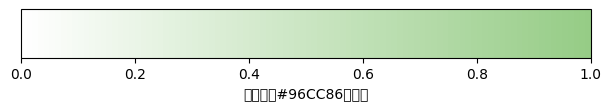

In [188]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

start_color = np.array([1, 1, 1])end_color = np.array([150/255, 204/255, 134/255])
def generate_gradient(start_color, end_color, num_shades):
    return [mcolors.to_hex(start_color * (1 - t) + end_color * t) for t in np.linspace(0, 1, num_shades)]

num_colors = 100gradient_colors = generate_gradient(start_color, end_color, num_colors)

fig, ax = plt.subplots(figsize=(6, 1), constrained_layout=True)
colormap = mcolors.ListedColormap(gradient_colors)
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=colormap), cax=ax, orientation='horizontal')
cb.set_label('从白色到plt.show()


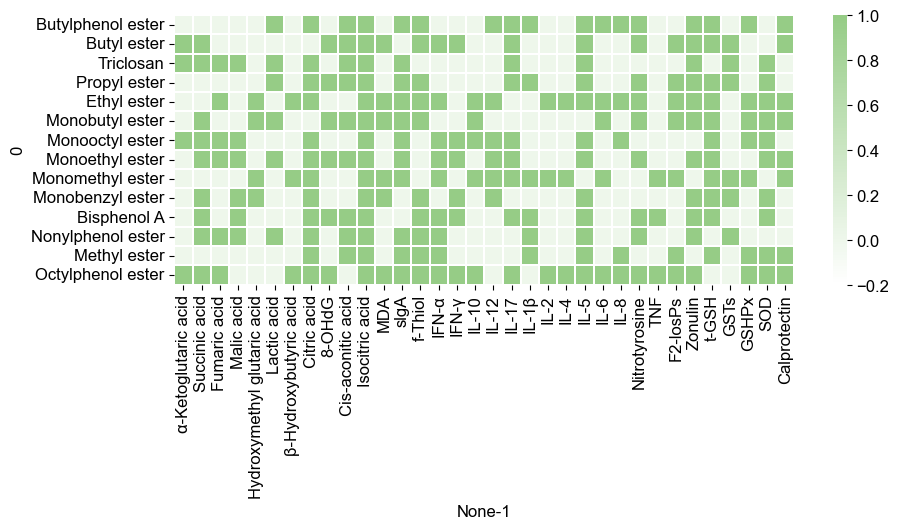

In [192]:
plot=heatmap.pivot(columns=1,index=0)

plt.figure(figsize=(10,3.5))
sns.heatmap(plot.fillna(0),lw=.1,cmap=colormap,vmin=-.2,vmax=1)
plt.xticks([i+0.5 for i in range(len(plot.columns))],[eng_chi_dict[i[1]] for i in plot.columns ]) 
plt.yticks([i+0.5 for i in range(len(plot.index))],[eng_chi_dict[i] for i in plot.index ]) 
plt.savefig('Fig5_heatmap.pdf', bbox_inches='tight')
plt.show()

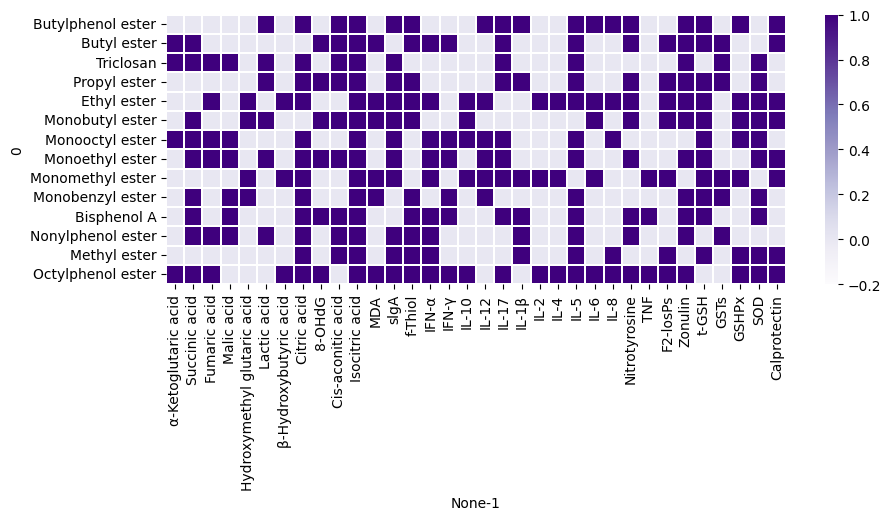

In [185]:
plot=heatmap.pivot(columns=1,index=0)

plt.figure(figsize=(10,3.5))
sns.heatmap(plot.fillna(0),lw=.1,cmap='Purples',vmin=-.2,vmax=1)
plt.xticks([i+0.5 for i in range(len(plot.columns))],[eng_chi_dict[i[1]] for i in plot.columns ]) 
plt.yticks([i+0.5 for i in range(len(plot.index))],[eng_chi_dict[i] for i in plot.index ]) 
plt.show()